<a href="https://colab.research.google.com/github/emma-ellsworth/DS1002-gbp4bh/blob/main/labs/lab2/lab2-race-results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 2: Determine Race Results with R

In this lab you will work with a dataset, writing R to generate the deliverables specified in the cells below.

The dataset for this lab is made up of fictitious results from a road race. Runner information and results is provided in the data.

Answer the questions below with the appropriate R code. Point assignments are indicated for each section. There are 10 total points possible for this lab.

Useful reference material (check all R modules within the Canvas site for more help)
- [R Reference Material](https://canvas.its.virginia.edu/courses/78571/modules#module_219810).
- [Plots Samples](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/25-plots-in-r.ipynb)

## Group Submissions

If you are working in a group to complete this lab, you may have no more than 3 members to a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Completed Individualy

## 1. Load Libraries & Data (1 pt)

https://raw.githubusercontent.com/nmagee/ds1002/main/data/road-race.csv

Import any necessary libraries and load the remote CSV file below into a data frame.

In [120]:
#
install.packages("tidyverse")
library(tidyverse)
library(dplyr)
library(tidyr)

data <-  read.csv("https://raw.githubusercontent.com/nmagee/ds1002/main/data/road-race.csv")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## 2. Get Summary Data (1 pt)

In code, display how many rows and columns are in the raw dataset.

In [121]:
#
str(data)

'data.frame':	764 obs. of  5 variables:
 $ runner_bib   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ runner_name  : chr  "Loydie Lopes" "Lorens Crispe" "Shirline Hasser" "Alleyn Hartshorn" ...
 $ runner_age   : int  17 33 22 39 50 44 51 44 30 60 ...
 $ runner_gender: chr  "Male" "Male" "Female" "Male" ...
 $ finish_time  : chr  "16:01" "15:40" "14:20" "17:06" ...


## 3. Clean and Organize the Data (2 pts)

Check for data quality.

- Resolve any duplicate rows.
- If a runner does not have a finish time, they are DNF and should not be counted in the dataset.



In [126]:
#
clean_data <- data %>%
  distinct() %>%
  filter(!(is.na(finish_time) | finish_time == ""))

Now display the first 10 rows of the cleaned dataset.

> Indented block



In [127]:
#
head(clean_data, 10)

,runner_bib,runner_name,runner_age,runner_gender,finish_time
,<int>,<chr>,<int>,<chr>,<chr>
1,1,Loydie Lopes,17,Male,16:01
2,2,Lorens Crispe,33,Male,15:40
3,3,Shirline Hasser,22,Female,14:20
4,4,Alleyn Hartshorn,39,Male,17:06
5,5,Wang MacColl,50,Male,16:49
6,6,Tonnie Tidder,44,Male,15:43
7,8,Basil Moxsom,44,Male,15:16
8,9,Lark Bragge,30,Female,15:59
9,10,Kent Wakely,60,Male,14:29


## 4. Calculate Elapsed Time (3 pts)

Using R, add a new column named `["finish_minutes"]` to the dataframe that calculates the number of minutes it took for the runner to complete the race. Ideally this is a column consisting of plain integers.

The starting gun was fired at precisely 12:00pm that day.

Note: This is calculated using a built-in function of R, `difftime()` which takes 3 parameters:

- End time
- Start time
- Units

The result is an output that figures the difference between the two: `3 days`, `14 years`, `112 mins`, etc.

The syntax for that function is below. Take care to use the proper order of parameters. The `as.POSIXct` casting makes it possible to read a long datetime in the `YYYY-MM-DDTHH:MM` format, a common `datetime` value. The `format` parameter specifies the pattern you are trying to read.

```
df$new-column <- (difftime( as.POSIXct(df$end-column, format="%Y-%m-%dT%H:%M"),
                            as.POSIXct(df$start-column, format="%Y-%m-%dT%H:%M"),
                            units="min"))
```

In [128]:
#
clean_data$finish_minutes <- as.integer(difftime(
  as.POSIXct(clean_data$finish_time, format="%H:%M"),
  as.POSIXct("12:00", format="%H:%M"),
  units="mins"
))


## 5. Identify Winners by Gender (2 pts)

Based on the minutes it took each runner to complete the race, identify the top three places for each gender.

There are several ways to do this, some of which require less code than others. You will only be graded for producing the correct output, not on how elegant/advanced your programming is.

In [129]:
#
sorted_data <- clean_data %>%
  group_by(runner_gender) %>%
  slice_max(order_by = finish_minutes, n = 3) %>%
  arrange(runner_gender, finish_minutes)

head(sorted_data, 16)

runner_bib,runner_name,runner_age,runner_gender,finish_time,finish_minutes
<int>,<chr>,<int>,<chr>,<chr>,<int>
18,Ike Ranson,20,Agender,16:45,285
12,Amalea Laurand,17,Agender,16:46,286
57,Pierson Chaney,52,Agender,16:58,298
139,Bob Brane,30,Bigender,17:01,301
162,Ariel Holyard,42,Bigender,17:01,301
191,Geri Conroy,22,Bigender,17:01,301
430,Cassondra Cudbertson,37,Female,17:08,308
529,Eula Wenderott,39,Female,17:08,308
418,Violetta Jedrzejczak,29,Female,17:09,309


## 6. Plot the Data (3 pts)

Finally, using `ggplot2` create two plots of the data -- density plots of race finishers.

- In the first plot use `finish_minutes` as the x axis.
- In the second plot use `runner_age` as the x axis.
- Use `runner_gender` as the fill.
- We suggest using a `geom_density(alpha=0.2)` or therabouts to see layers through one another.
- Use the `gridExtra` library's `grid.arrange()` method to plot them both.

You will note that since this is artificial data you will be able to see the gender layers clearly enough but they will not be statistically meaningful.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



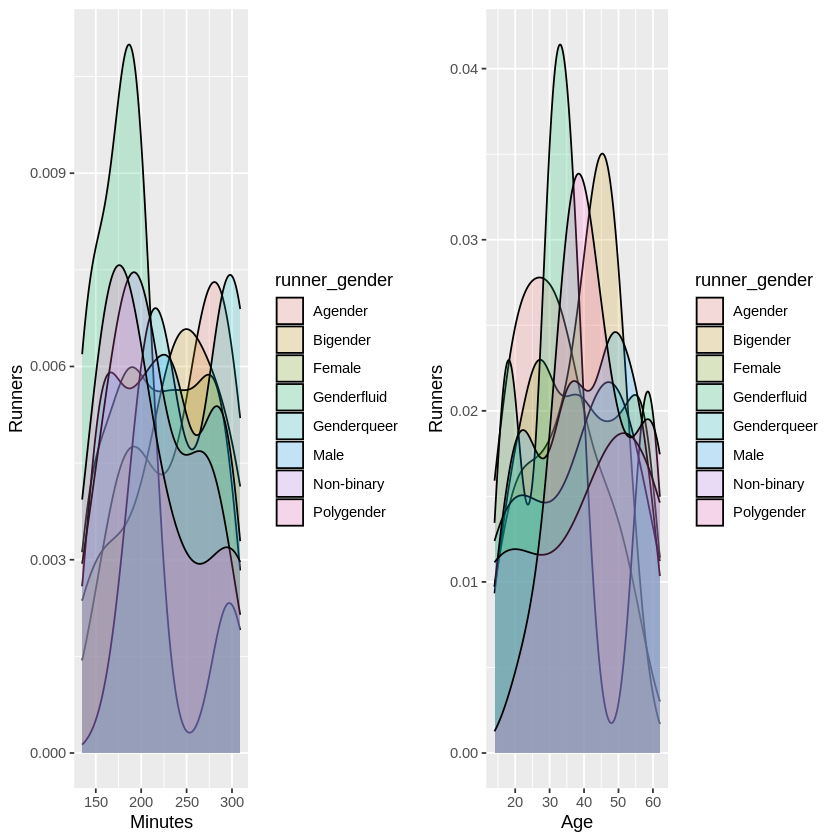

In [130]:
#
library(ggplot2)
install.packages("gridExtra")
library(gridExtra)

sidebyside <- function(data, xaxis, name) {
  ggplot(data, aes(x= !!sym(xaxis), fill= runner_gender)) +
    geom_density(alpha=0.2) +
    labs(x= name, y="Runners")
}

minutes_plot <- sidebyside(clean_data, "finish_minutes", "Minutes")
age_plot <- sidebyside(clean_data, "runner_age", "Age")

grid.arrange(minutes_plot, age_plot, ncol = 2)
